In [2]:
import pandas as pd
import numpy as np 
data = pd.read_excel('sb_final.xlsx', 'Sheet1')

In [16]:
idx[np.r_[3:9,10,12:35]]
idx[np.r_[9,11]]

array(['CUST_VINTAGE_YRS', 'AVG_BAL', 'DEBIT_CNT_20_21',
       'CREDIT_CNT_20_21', 'AVG_AMT_D_20_21', 'AVG_AMT_C_20_21', 'AGE',
       'VEHICLE_LOAN', 'SUIT_FILED_NON_SUIT_FILED', 'HOME_LOAN',
       'NON_FUND', 'DEPOSIT_LOAN', 'EDU_LAON_GOVT_SCHEMES',
       'AGRI_TERM_LOAN', 'WC_LOAN', 'WAREHOUSE_LOAN', 'AGRI_JEWEL_LOAN',
       'MORTGAGE_LOAN', 'EXPORT_CREDIT', 'PERSONAL_LOAN_STAFF',
       'HOME_LOAN_STAFF', 'EDU_LOAN_STAFF', 'BILLS_DISCOUNTED',
       'TERM_LOAN', 'AGRI_WC', 'PERSONAL_LOAN', 'VEHICLE_LOAN_STAFF',
       'TOD_PROFESSIONAL_LOAN', 'OTHER_LOAN', 'JEWEL_LOAN'], dtype=object)

In [35]:
data = data.dropna(how='any',axis=0)
d = data.columns
idx=np.array(d)

In [25]:
bank_cust = data.copy()
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
numeric_subset = data[idx[np.r_[3:9,10,12:35]]]#.apply(pd.to_numeric)
#numeric_subset = numeric_subset.apply(le.fit_transform)
categorical_subset = data[idx[np.r_[9,11]]]

    # One hot encoding
categorical_subset = pd.get_dummies(categorical_subset)
    # Join the two dataframes using concat
bank_cust = pd.concat([numeric_subset, categorical_subset], axis = 1)
#X = bank_cust.drop(['HL'], axis = 1)
X = bank_cust
y = data[idx[np.r_[2]]]

In [27]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [28]:
from xgboost import XGBClassifier
model = XGBClassifier( learning_rate=0.1,objective='binary:logistic',n_estimators=100
              , max_depth=7,use_label_encoder=False)
model.fit(X_train,y_train)

[16:25:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=7, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [1]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver="liblinear", random_state=0).fit(X_train, y_train)
prediction = clf.predict(X_test)
from sklearn.metrics import (confusion_matrix,
                           accuracy_score)
# confusion matrix
cm = confusion_matrix(y_test, prediction)
print ("Confusion Matrix : \n", cm)
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_test, prediction))

NameError: name 'X_train' is not defined

In [29]:
prediction = model.predict(X_test)
from sklearn.metrics import (confusion_matrix,
                           accuracy_score)
# confusion matrix
cm = confusion_matrix(y_test, prediction)
print ("Confusion Matrix : \n", cm)
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_test, prediction))

Confusion Matrix : 
 [[157058    168]
 [  6301   3540]]
Test accuracy =  0.9612790078232086


In [32]:
pred_train = model.predict_proba(X_train)[:,1]
pred_test = model.predict_proba(X_test)[:,1]
pred_test_class = np.where(pred_test >0.8,1,0)

In [33]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_train,pred_train))
print(roc_auc_score(y_test,pred_test))

0.8881482298734351
0.8706307362095803


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


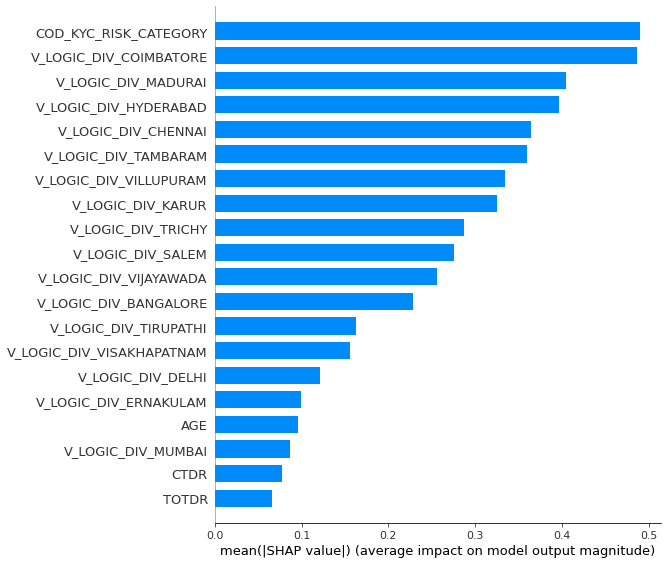

In [8]:
import shap
shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [11]:
from sklearn.metrics import (confusion_matrix,
                           accuracy_score)
# confusion matrix
cm = confusion_matrix(y_test, pred_test_class)
print ("Confusion Matrix : \n", cm)
# accuracy score of the model
print('Test accuracy = ', accuracy_score(pred_test_class,y_test))

Confusion Matrix : 
 [[9678   13]
 [ 477  836]]
Test accuracy =  0.955470737913486


In [35]:
import pandas as pd
import numpy as np 
data1 = pd.read_excel('Ctest.xlsx', 'Sheet1')

In [36]:
bank_cust = data1.copy()
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
numeric_subset = data1[['TOTDR','TOTCR','CTDR','CTCR', 'AGE', 'COD_KYC_RISK_CATEGORY']]#.apply(pd.to_numeric)
numeric_subset = numeric_subset.apply(le.fit_transform)
categorical_subset = data1[['CUST_PROFESSION', 'TXT_CUST_SEX']]
    # One hot encoding
categorical_subset = pd.get_dummies(categorical_subset)
    # Join the two dataframes using concat
bank_cust = pd.concat([numeric_subset, categorical_subset], axis = 1)
#X = bank_cust.drop(['HL'], axis = 1)
bank_cust1 = bank_cust.copy()
for y in X_train.columns:
    if (y not in bank_cust.columns):
        bank_cust1[y] = [0]*len(bank_cust1)
X = bank_cust1[X_train.columns]                       
y = data1['HL']

<ipython-input-36-676d4461d1dd>:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  bank_cust1[y] = [0]*len(bank_cust1)


In [37]:
pred_oot = model.predict_proba(X)[:,1]
print(roc_auc_score(y,pred_oot))
max(pred_oot)
pred_oot_class=np.where(pred_oot > 0.2,1,0)
#prediction = list(map(round, yhat))

0.4962117359335833


In [38]:
from sklearn.metrics import (confusion_matrix,
                           accuracy_score)
# confusion matrix
cm = confusion_matrix(y, pred_oot_class)
print ("Confusion Matrix : \n", cm)
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y, pred_oot_class))

Confusion Matrix : 
 [[     0 109362]
 [     0    178]]
Test accuracy =  0.001624977177286836


In [62]:
bank = pd.concat([data1, pd.DataFrame(prediction)], axis = 1)
ban = bank[bank[0] == 1]

NameError: name 'prediction' is not defined

In [72]:
data1.describe()

,COD_CUST_ID,COD_KYC_RISK_CATEGORY,AGE,TOTDR,TOTCR,CTDR,CTCR,HL,Unnamed: 12
count,1.095400e+05,109540.000000,109539.000000,1.095400e+05,1.095400e+05,109540.000000,109540.000000,109540.000000,1.780000e+02
mean,9.885899e+06,2.536735,42.452775,6.133928e+04,6.267155e+04,6.636869,3.603723,0.001625,8.188819e+06
std,4.731786e+06,0.532917,12.177102,2.466533e+05,2.916184e+05,10.750642,12.417251,0.040278,4.583988e+06
min,1.650100e+04,1.000000,4.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,8.887500e+04
25%,6.387804e+06,2.000000,34.000000,2.345133e+02,8.566667e+01,0.666667,0.333333,0.000000,4.979250e+06
50%,9.565796e+06,3.000000,41.000000,1.556306e+04,1.553400e+04,2.666667,1.666667,0.000000,7.809540e+06
75%,1.370929e+07,3.000000,50.000000,5.777485e+04,5.872462e+04,8.333333,4.000000,0.000000,1.010699e+07
max,2.082041e+07,3.000000,221.000000,2.973350e+07,4.538155e+07,282.333333,1468.000000,1.000000,1.882102e+07


In [73]:
data.describe()

,COD_CUST_ID,COD_KYC_RISK_CATEGORY,AGE,TOTDR,TOTCR,CTDR,CTCR,HL
count,1.464010e+05,146401.000000,146401.000000,1.464010e+05,1.464010e+05,146401.000000,146401.000000,146401.000000
mean,1.102953e+07,2.559279,40.397401,8.885351e+04,9.018023e+04,9.832159,6.134386,0.123531
std,5.112206e+06,0.515562,9.220515,2.172281e+05,2.202894e+05,13.682241,16.391808,0.329046
min,1.752200e+04,1.000000,5.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,7.190828e+06,2.000000,33.000000,1.367548e+04,1.385260e+04,1.578947,1.000000,0.000000
50%,1.080901e+07,3.000000,40.000000,4.129817e+04,4.179307e+04,4.666667,2.500000,0.000000
75%,1.508768e+07,3.000000,47.000000,9.850182e+04,9.955633e+04,12.933333,6.529412,0.000000
max,2.347495e+07,3.000000,222.000000,2.578529e+07,2.580768e+07,431.650000,1054.500000,1.000000


In [ ]:
ban.to_excel('valC.xlsx')